In [1]:
from numpy import real, exp, angle, linspace, arange, zeros, sin, pi, transpose, array
from numpy.fft import fft, ifft
from numpy.random import permutation
from matplotlib.pyplot import subplots, xlabel, ylabel, hist, bar, yticks, legend, axis


In [2]:
from pandas import read_csv

path = '../Data/ArRy_Seizure1_export.csv'
# path = '/Users/GB/Desktop/ArRy_Seizure1-export.csv'

data = read_csv(path, delimiter=r"\s+")
data = data.values
data.shape


(4611, 117)

In [3]:
def UnivariateSurrogates(data_f,MaxIter):
    
    xs=data_f.copy()
    xs.sort() #sorted amplitude stored
    pwx=abs(fft(data_f)) # amplitude of fourier transform of orig
    
    data_f.shape = (-1,1)
    xsur = permutation(data_f) #random permutation as starting point
    xsur.shape = (1,-1)
    
    for i in range(MaxIter):
        fftsurx = pwx*exp(1j*angle(fft(xsur)))
        xoutb = real(ifft(fftsurx))
        ranks = xoutb.argsort(axis=1)
        xsur[:,ranks] = xs
    return(xsur)


In [4]:
surrogates = zeros((data.shape[0], data.shape[1]))

for index, column in enumerate(data.transpose()):
    surr = UnivariateSurrogates(column, 100)
    surrogates[:, index] = surr

surrogates.shape


(4611, 117)

Fourier spectrum of surrogates should be the same as that of the data.


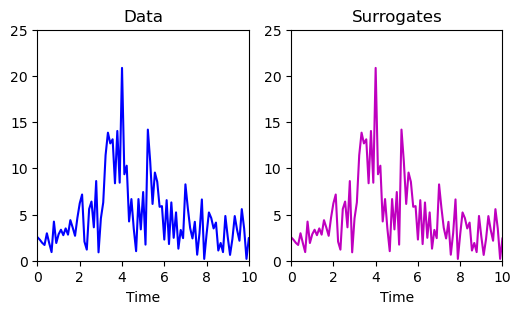

In [5]:
rows = data.shape[0]

sr = 512

freqs = (sr/2)*linspace(0, 1, rows // 2)

data_fft = fft(data, axis=0)

data_amplitudes = (2.0 / rows) * abs(data_fft[:rows//2, :])

data_surr_fft = fft(surrogates, axis=0)

data_surr_amplitudes = (2.0 / rows) * abs(data_surr_fft[:rows//2, :])

xlim, ylim = 10, 25

fig, ax = subplots(ncols=2, figsize=(6, 3))

ax[0].plot(freqs, data_amplitudes[:,11], color='b');
ax[0].set_xlim(0, xlim);
ax[0].set_ylim(0, ylim);
ax[0].set_title('Data')
ax[0].set_xlabel('Time')


ax[1].plot(freqs, data_surr_amplitudes[:,11], c='m');
ax[1].set_xlim(0, xlim);
ax[1].set_ylim(0, ylim);
ax[1].set_title('Surrogates')
ax[1].set_xlabel('Time');
